In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cma

# this is just defining the function you want to minimize

<AxesSubplot:>

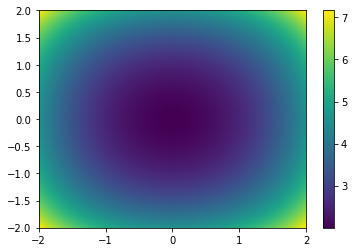

In [43]:
def func_map(cen_x=0,cen_y=0):
    return lambda x,y : np.cos((x-cen_x))+np.cos((y-cen_y))+(x-cen_x)**2+(y-cen_y)**2

def plot_background(X,Y,values):
    fig,ax=plt.subplots()
    im=ax.pcolormesh(X,Y,values,shading='auto')
    plt.colorbar(im)
    return ax

center_func=func_map(-0,0)

xs=np.linspace(-2,2,1000)

X,Y=np.meshgrid(xs,xs)
values=center_func(X,Y)

plot_background(X,Y,values)


# this runs an entire optimization, in the end you want something a little more complicated than this, but it shows how simple it is.

In [44]:
#where_to_save_data='/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/test'
where_to_save_data = 'C:/Users/torbj/Desktop/project/kwantrl_data/'
opts=cma.CMAOptions(**{'verb_filenameprefix':where_to_save_data})
es = cma.CMAEvolutionStrategy(np.random.uniform(xs[0],xs[-1],2),0.1,opts)

while not es.stop():
    
    proposed_solutions=es.ask() #returns a list of possible solutions
    evaluated_solutions=[center_func(*proposed_solutions[i]) for i in range(len(proposed_solutions))] #evaluate all those possible solutions by your function
    es.tell(proposed_solutions,evaluated_solutions) #tell the evultionary strategy what you measured
    es.logger.add() #adds things to logging
    es.disp()
es.result_pretty()

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=155218, Wed Apr 27 17:31:03 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.865073502439468e+00 1.0e+00 9.15e-02  8e-02  9e-02 0:00.0
    2     12 3.441275684664508e+00 1.3e+00 1.60e-01  1e-01  2e-01 0:00.0
    3     18 3.195878582811142e+00 1.2e+00 2.19e-01  2e-01  2e-01 0:00.0
   70    420 2.000000000000006e+00 1.5e+00 4.15e-05  7e-08  1e-07 0:00.1
termination on tolfun=1e-11
final/bestever f-value = 2.000000e+00 2.000000e+00
incumbent solution: [-9.878341079370877e-08, -1.7200562297466876e-08]
std deviation: [7.121927784903207e-08, 9.646235572403009e-08]


CMAEvolutionStrategyResult(xbest=array([-2.5952032e-08, -3.0519381e-08]), fbest=2.000000000000001, evals_best=413, evaluations=420, iterations=70, xfavorite=array([-9.87834108e-08, -1.72005623e-08]), stds=array([7.12192778e-08, 9.64623557e-08]), stop={'tolfun': 1e-11})

# here i have made an ilustrative example of how it moves during a search, the class will do single iterations at a time and can plot the suggested solutions

In [45]:
class Slow_cma():
    def __init__(self,):
        opts=cma.CMAOptions(**{'verb_filenameprefix':where_to_save_data})
        self.es = cma.CMAEvolutionStrategy(np.random.uniform(xs[0],xs[-1],2),0.1,opts)
        self.iter_nr=0

    def one_iteration(self,):
        if not self.es.stop():
            proposed_solutions=self.es.ask()
            evaluated_solutions=[center_func(*proposed_solutions[i]) for i in range(len(proposed_solutions))]
            self.es.tell(proposed_solutions,evaluated_solutions)
            self.es.logger.add()
            self.es.disp()
            self.iter_nr+=1
            return np.array(proposed_solutions)
        else:
            self.es.result_pretty()
        

    def plot_iteration(self,proposed_solutions,ax=None):
        ax.scatter(proposed_solutions[:,0],proposed_solutions[:,1],c='r')
        ax.set_title(f'iteration : {self.iter_nr}')
        return ax



# here running 10 iterations at a time and plottting the points

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(cov,mean, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    
    See how and why this works: https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html
    
    This function has made it into the matplotlib examples collection:
    https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
    
    Or, once matplotlib 3.1 has been released:
    https://matplotlib.org/gallery/index.html#statistics
    
    I update this gist according to the version there, because thanks to the matplotlib community
    the code has improved quite a bit.
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        edgecolor='r',
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=173161, Wed Apr 27 17:31:03 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 6.346559202278495e+00 1.0e+00 1.21e-01  1e-01  1e-01 0:00.0
    2     12 5.193536699152958e+00 1.4e+00 2.24e-01  3e-01  3e-01 0:00.0
    3     18 4.240704247512554e+00 1.8e+00 3.38e-01  4e-01  4e-01 0:00.0


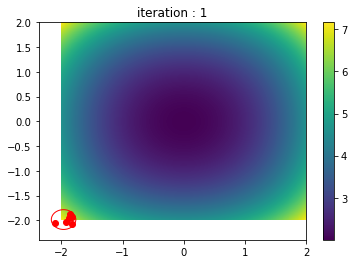

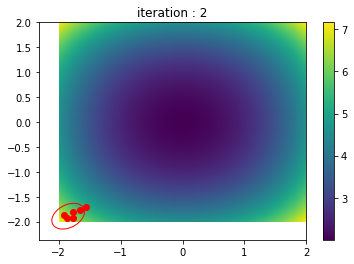

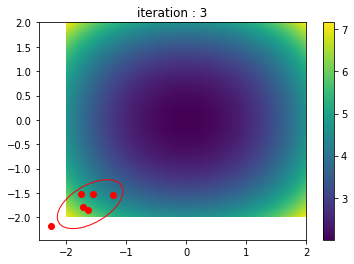

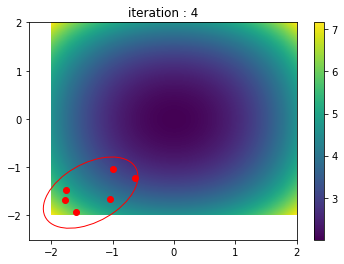

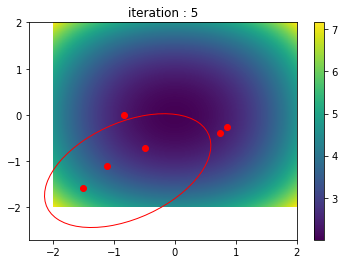

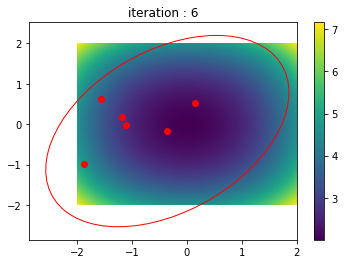

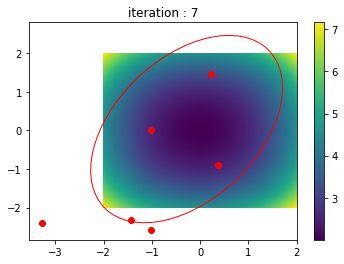

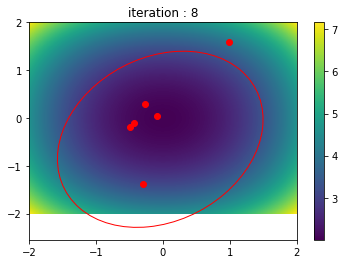

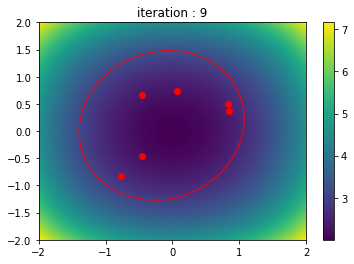

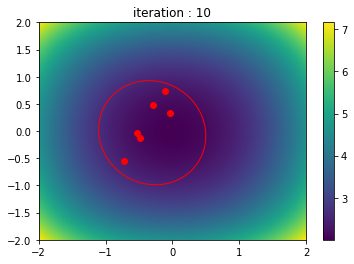

In [47]:
hhh = Slow_cma()
for i in range(10):
    new_background=plot_background(X,Y,values)
    confidence_ellipse(hhh.es.C*hhh.es.sigma**2,hhh.es.mean,ax=new_background,n_std=2)
    proposed_solutions=hhh.one_iteration()
    hhh.plot_iteration(proposed_solutions,new_background)
    

In [48]:
def new_func(solution):
    val=center_func(solution[0],solution[1])
    return {'val':val}

In [49]:
from kwantrl.optimization.cma import CmaRunner
from kwantrl.datahandling.datahandling import datahandler
dat=datahandler(data_path=where_to_save_data)
runner=CmaRunner(new_func,np.random.uniform(xs[0],xs[-1],2),sigma0=0.5,datahandler=dat)

data saved to:C:/Users/torbj/Desktop/project/kwantrl_data//outcmaes/28/
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=188652, Wed Apr 27 17:31:09 2022)


In [50]:
runner.optimize()

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 2.188266376509484e+00 1.0e+00 4.65e-01  4e-01  5e-01 0:00.0
    2     12 2.075129811911038e+00 1.2e+00 5.10e-01  4e-01  5e-01 0:00.0
    3     18 2.026928229537789e+00 1.5e+00 4.68e-01  3e-01  5e-01 0:00.0
   70    420 2.000000000000008e+00 1.2e+00 6.67e-05  2e-07  2e-07 0:00.1
termination on tolfun=1e-11
final/bestever f-value = 2.000000e+00 2.000000e+00
incumbent solution: [-7.973170046536582e-08, -4.0089642295732536e-08]
std deviation: [2.1883611668326824e-07, 1.8574741861986335e-07]
